In [1]:
#import relevant libraries
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
#import dabest
from struct import *
import osar
import scipy as sp
import re
import dabest
#import dabest_nbdev
# import dabest_jck
import warnings
from datetime import datetime
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

date = datetime.today().strftime('%Y%m%d')
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")


Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 26.95it/s]

Numba compilation complete!


In [5]:
basegenotype = "SS95118"
responder = "ACR"
wt = "w1118"
addNotes = basegenotype + " x " + responder


officecomp = "C:\\Users\\Star\\"
labcomp = "C:\\Users\\User\\"
computer2 = "C:\\Users\\lnico\\"
computer3 = "D:\\"
filedirectory_OSAR = "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\"
specifiedpath = computer3
baseDirectory_OSAR = specifiedpath + filedirectory_OSAR + addNotes


#OSAR related files
if len(addNotes) > 0:
    addNotes = "_" + addNotes   
filename_O = baseDirectory_OSAR + "\\" + basegenotype
filename_AppendDT = "_gen " + date
filename_O = filename_O + addNotes + filename_AppendDT

filename_O

'D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\SS95118 x ACR\\SS95118_SS95118 x ACR_gen 20250115'

In [3]:
def singleplottingdabest(dfi, names, parameter):
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[(dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    #dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfrr.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfrr, idx=titlelst, ci=90)    
    
    return test

In [6]:
osarAnalysis = osar.osar(baseDirectory_OSAR,
                        # border_shift_mm = 1.5,  
                        # countlog_folder = "countlog_Full Only",         
                        # countlog_folder = "countlog_Half and Full",
                         driver = basegenotype)

Creating borders for each fly...
Done.

Processing CSV 55 of 55
Summarising results for all flies...
All done.


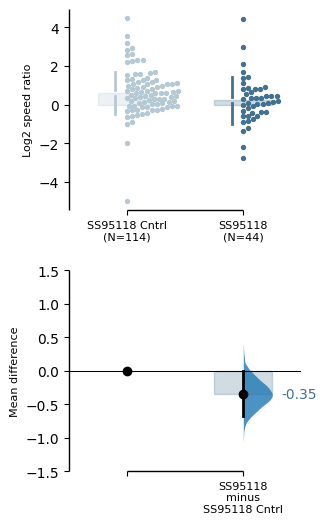

In [7]:
full_light = osarAnalysis.results[osarAnalysis.results['light_intensity'] == "Full"]
singleplottingdabest(full_light, basegenotype,'log2_speed_ratio_Pattern 01').mean_diff.plot(float_contrast=False, fontsize_rawylabel=8, fontsize_rawxlabel=8, 
                                                                      fontsize_contrastxlabel=8, fontsize_contrastylabel=8, raw_marker_size=2, es_marker_size=6, 
                                                                      custom_palette="Paired", swarm_label="Log2 speed ratio", contrast_ylim=(-1.5,1.5));